<a href="https://colab.research.google.com/github/AlejoGalloM/MachineLearning/blob/master/Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taller 3**
*En este trabajo se presenta la implementación del algoritmo de gradiente descendente para regresión logística.*

**Integrantes**
* Alejandro Cifuentes Montoya
* Alejandro Gallo Murillo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
#Importaciones utilizadas
import pandas as pd                                   #Librería para la lectura y manejo de datos
import numpy as np                                    #Librería para la computación de datos numéricos
import matplotlib.pyplot as plt                       #Librería usada para graficar datos
from matplotlib.ticker import PercentFormatter        #Librería usada para formatear números como porcentajes

from sklearn.model_selection import train_test_split

plt.rc('font', size= 16)

In [3]:
#Se leen los datos de la base y se agregan sus etiquitas correspondientes para cada  (Drive)
col_names= ['pregnant', 'glucose', 'bp', 'skin', 'insulin','bmi', 'pedigree', 'age', 'label']

path='drive/MyDrive/data/'
pima= pd.read_csv(path+'diabetes.csv')
pima= pima.set_axis(col_names, axis=1)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Las etiquetas y las caraterísticas son separadas

X= pima.drop('label', axis=1)
X=X.values
y= pima.label
y=y.values


In [14]:
# Se separan los datos en los conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=4)

## **Estandarización de caracteristicas**

In [6]:
def Estandariza(object):
   Standard= np.zeros(((object.shape[0]),(object.shape[1])))
   #print(Standard.shape)
   media=np.zeros((object.shape[1]))
   desviacion=np.zeros((object.shape[1]))
   for i in range(object.shape[1]): 
        media[i]=(np.mean(object[:,i]))
        desviacion[i]=(np.std(object[:,1]))
   matrizestandarizada=np.zeros(((object.shape[0]),(object.shape[1])))
   for j in range(object.shape[1]):
       for i in range(object.shape[0]):
           matrizestandarizada[i,j]=((object[i,j])-(media[j]))/(desviacion[j]) 
   return matrizestandarizada, media, desviacion


## **Matriz de confusión**

In [7]:
def confusion(etiquetas,predicciones):
 
  valormaximo=(np.amax(etiquetas))
  valorminimo=(np.amin(etiquetas))
  matrizconfusion=np.zeros((valormaximo+1,valormaximo+1))
  for i in range(etiquetas.shape[0]):
      if etiquetas[i]==predicciones[i]:
        matrizconfusion[etiquetas[i],etiquetas[i]]+=1
      else:
        matrizconfusion[etiquetas[i],predicciones[i]]+=1  

  ACC=(matrizconfusion.diagonal().sum())/(predicciones.shape[0]) 
  sensibility=matrizconfusion[1,1]/(matrizconfusion[1,:].sum())
  especificidad=matrizconfusion[0,0]/(matrizconfusion[0,:].sum())
  precision=matrizconfusion[1,1]/(matrizconfusion[:,1].sum())  
  F1score=(2*precision*sensibility)/(precision+sensibility)
     
  return matrizconfusion,ACC,sensibility,especificidad,precision,F1score 

## **Punto 1**

*Realizar una función en Python para aplicar el algoritmo de Gradiente Descendente para Regresión Lo gística. La función recibe como argumentos el vector de parámetros actuales, la matriz de características, el vector de etiquetas y el valor de la velocidad de aprendizaje, y retorna el nuevo vector de parámetros.*

In [8]:
def Gradiente_Descendente(phi_zeta,caracteristicas,etiquetas,velocidad_aprendizaje):

  for i in range(vector_theta.shape[0]):
    sumatoria=np.zeros(((caracteristicas.shape[0]),1))
    X_train_columna = caracteristicas[:,i]
    
    for j in range(caracteristicas.shape[0]):  
      sumatoria[j][0]=(X_train_columna[j] * (etiquetas[j]-phi_zeta[j][0]))    
    print(sum(sumatoria))
    vector_theta[i][0] = vector_theta[i][0] + ( velocidad_aprendizaje * sum(sumatoria))       
  
  return vector_theta

## **Punto 2**
*La función recibe una matriz de características de test y el vector de parámetros, y retorna un vector de probabilidades.*

In [9]:
def funcion_sigmoide(vectordetheta,matrizcaracteristica):
  vector_theta_transp=np.transpose(vectordetheta)
  X_inter_transp=np.transpose(matrizcaracteristica) 
  temp_theta=np.dot(vector_theta_transp,X_inter_transp)  
  for i in range(temp_theta.shape[1]):  
    phi_zeta[0,i]=(1/(1+ (np.exp(-(temp_theta[0,i])))))    
  return phi_zeta

## **Punto 3**
*La función recibe como argumentos los datos de test (características y etiquetas) y un vector de probabi lidades (predicciones) y retorna un escalar con el valor de la función de coste.*

In [10]:
def funcion_coste(predicciones, etiquetas):
  predicciones_columna= (predicciones.reshape(-1))

  coste=-( sum( (etiquetas * (np.log(predicciones_columna))) + ((1-etiquetas) * np.log(1-predicciones_columna)) ))

  return coste

## **Punto 4**
Realizar una función en Python para calcular el área bajo la curva ROC y dibujar la curva ROC. La función recibe como argumentos un vector de etiquetas y un vector de probabilidades, y la función dibuja la curva ROC y retorna el valor del AUC.

In [11]:
def ROC_AUC(etiquetas,probabilidades):
  sensibilidad=np.zeros(probabilidades.shape[0])
  espe=np.zeros(probabilidades.shape[0])
  matriz=np.append(etiquetas,probabilidades,axis=1)
  matriz=matriz[matriz[:,1].argsort()[::-1]]
  unique, counts = np.unique( matriz[:,0],return_counts=True)
  ceros=dict(zip(unique, counts)).get(0)
  unos=dict(zip(unique, counts)).get(1)
  for i in range(probabilidades.shape[0]):
     cont=0
     contcero=0
     for j in range(probabilidades.shape[0]): 
          if matriz[j,1]>matriz[i,1]:
             if matriz[j,0]==1:
               cont=cont+1
          elif matriz[j,1]<=matriz[i,1]:
             if matriz[j,0]==0:
                contcero=contcero+1
     sensibilidad[i]=cont/unos
     espe[i]=1-(contcero/ceros)       
  return sensibilidad,espe

In [15]:
# Estandarizacion de variables
X_train_Stand,media,desviacion= Estandariza(X_train)
X_inter=np.ones(((X_train_Stand.shape[0], X_train_Stand.shape[1]+1)))
for i in range(X_inter.shape[1]-1):
  X_inter[:,i+1]= X_train_Stand[:,i]

# Se crea vector phi de zeta de predicciones
phi_zeta=np.ones((1,(X_inter.shape[0])))

# Se crea vector vector theta
vector_theta=np.ones((len(X_train[0])+1,1))
print(X_inter)
print(vector_theta)

[[ 1.          0.0699329  -0.58312425 ... -0.0319093  -0.00940639
   0.09215663]
 [ 1.         -0.02559599  0.88165203 ...  0.02222373 -0.00698632
  -0.35364485]
 [ 1.          0.19730475  0.14926389 ... -0.02235641 -0.00861031
   0.25137144]
 ...
 [ 1.          0.0699329  -0.42390944 ...  0.15914847  0.00801171
  -0.06705818]
 [ 1.         -0.05743896 -1.44288425 ... -0.06693656 -0.00335623
  -0.00337226]
 [ 1.         -0.05743896 -0.42390944 ...  0.05725099 -0.00227357
  -0.32180189]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [16]:
for j in range(1000):
  funcion_sigmoide(vector_theta,X_inter)
  phi_zeta_columna=np.transpose(phi_zeta)
  Gradiente_Descendente(phi_zeta_columna, X_inter, y_train, 0.01)
print(funcion_coste(phi_zeta, y_train))
print(vector_theta)
print(phi_zeta)


Se han truncado las últimas 5000 líneas del flujo de salida.
[556.14905916]
[3.94865256]
[0.58890087]
[-15.83974277]
[14.8666512]
[5.19135539]
[-17.51698424]
[-7.65433609]
[-50.52964824]
[-556.13320269]
[-3.11167614]
[0.05548605]
[15.48483142]
[-14.91363139]
[-2.68523217]
[17.46948893]
[7.55975095]
[50.38821358]
[556.12000857]
[3.94383542]
[0.58884307]
[-15.83864616]
[14.86141565]
[5.18950108]
[-17.52611633]
[-7.65343799]
[-50.52429173]
[-556.10423453]
[-3.11517886]
[0.05551021]
[15.48403643]
[-14.90806069]
[-2.68987485]
[17.47909182]
[7.55923926]
[50.38430786]
[556.09116551]
[3.93908287]
[0.58878578]
[-15.8375399]
[14.85621642]
[5.18765071]
[-17.53518644]
[-7.65256451]
[-50.51897272]
[-556.0754735]
[-3.11864696]
[0.05553426]
[15.48324634]
[-14.90252975]
[-2.69450965]
[17.48862769]
[7.55874851]
[50.38042225]
[556.06252761]
[3.93439399]
[0.588729]
[-15.83642425]
[14.8510532]
[5.1858043]
[-17.5441953]
[-7.65171524]
[-50.51369076]
[-556.04691721]
[-3.12208083]
[0.05555819]
[15.48246104]
[

In [17]:
y_predic=np.ones((1,(X_inter.shape[0])))
for i in range(phi_zeta.shape[1]):  
  if (phi_zeta[0,i]>=0.5):
    y_predic[0,i]=1
  else:
    y_predic[0,i]=0

print(y_predic)
print(y_train)

[[1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1.
  0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
  1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0.
  0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
  0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.
  1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
  1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
  1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
  1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 

In [18]:
y_predic_reshape=(y_predic.reshape(-1)).astype(int)
matriz=confusion(y_train,y_predic_reshape)
print('Matriz confusión:\n',matriz[0],'\nAccuracy: \n',matriz[1],'\nSensibility: \n',matriz[2],'\nEspecificidad: \n',matriz[3],'\nPrecision: \n',matriz[4],'\nF1score: \n',matriz[5])

Matriz confusión:
 [[270. 104.]
 [ 89. 113.]] 
Accuracy: 
 0.6649305555555556 
Sensibility: 
 0.5594059405940595 
Especificidad: 
 0.7219251336898396 
Precision: 
 0.5207373271889401 
F1score: 
 0.5393794749403342


# **Puntos 5 y 6**

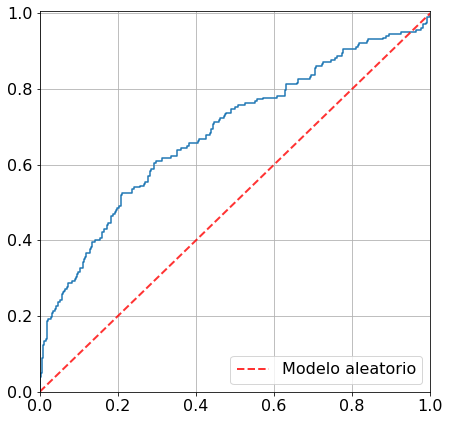

In [19]:
phi_zeta_columna=np.transpose(phi_zeta)
y_train_columna=y_train.reshape(y_train.shape[0],1)

A=ROC_AUC(y_train_columna,phi_zeta_columna)
plt.figure(figsize=(7,7))
plt.plot(A[1], A[0])
plt.plot([0,1],[0,1], linestyle = '--', lw=2, color= 'r', alpha= 0.8, label= 'Modelo aleatorio')
plt.grid()
plt.xlim([0,1])
plt.ylim([0,1.005])
plt.legend(loc=4);

#**Conclusión**
*Se puede ver como la implementación de métodos que proporcionan las librerías de sklearn pueden ser implementados de manera adecuada mediante la programación y el conocimiento sobre cómo implementar los moele.*